In [ ]:
import zipfile as zf
files = zf.ZipFile("pruebas.zip",'r')
files.extractall()
files.close()

In [ ]:
import torch
import torch.nn as nn
from math import prod,sqrt
import fastai.vision.all as fv
from torchvision.transforms import ToTensor, ToPILImage
from pathlib import Path

to_tensor = ToTensor()
to_pil = ToPILImage()

In [ ]:
!ls prueba2

train  valid


In [ ]:
!ls prueba2/train

Acadian_Flycatcher		Lazuli_Bunting
American_Crow			Le_Conte_Sparrow
American_Goldfinch		Least_Auklet
American_Pipit			Least_Flycatcher
American_Redstart		Least_Tern
American_Three_toed_Woodpecker	Lincoln_Sparrow
Anna_Hummingbird		Loggerhead_Shrike
Artic_Tern			Long_tailed_Jaeger
Baird_Sparrow			Louisiana_Waterthrush
Baltimore_Oriole		Magnolia_Warbler
Bank_Swallow			Mallard
Barn_Swallow			Mangrove_Cuckoo
Bay_breasted_Warbler		Marsh_Wren
Belted_Kingfisher		Mockingbird
Bewick_Wren			Mourning_Warbler
Black_Tern			Myrtle_Warbler
Black_and_white_Warbler		Nashville_Warbler
Black_billed_Cuckoo		Nelson_Sharp_tailed_Sparrow
Black_capped_Vireo		Nighthawk
Black_footed_Albatross		Northern_Flicker
Black_throated_Blue_Warbler	Northern_Fulmar
Black_throated_Sparrow		Northern_Waterthrush
Blue_Grosbeak			Olive_sided_Flycatcher
Blue_Jay			Orange_crowned_Warbler
Blue_headed_Vireo		Orchard_Oriole
Blue_winged_Warbler		Ovenbird
Boat_tailed_Grackle		Pacific_Loon
Bobolink			Painted_Bunting
Bohemian_Waxwing		Pa

In [ ]:
birds = Path("prueba2/")

In [ ]:
files = fv.get_image_files("prueba2"); files


(#17582) [Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0080_796096.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0060_796076.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0057_796106.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0069_796139.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0081_426.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0067_170.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg'),Path('prueba2/train/Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg')...]

In [ ]:
fv.doc(fv.get_image_files)


In [ ]:
fv.doc(fv.aug_transforms)


In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.2,max_zoom=1.0,max_warp=0.2,)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data(birds, img_size=255, batch_size=32)

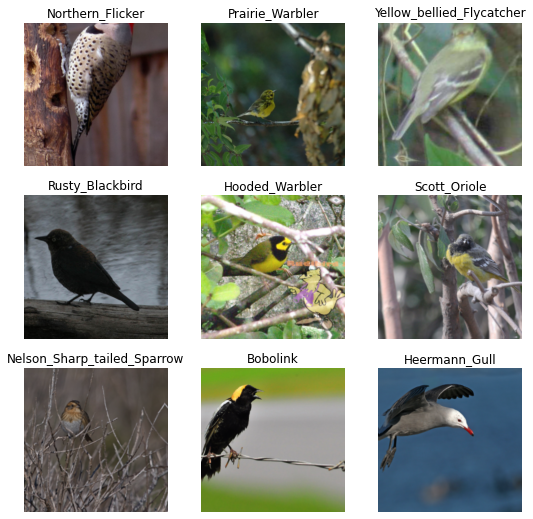

In [ ]:
data.show_batch()


In [ ]:
learner = fv.cnn_learner(data,model, metrics = fv.accuracy)


In [ ]:
learner.lr_find()


In [ ]:
learner.fit_one_cycle(3,lr_max=1e-2)

In [ ]:
class Flatten(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self,x):
        return x.reshape(x.shape[0],-1)
    
def num_params(model):
    return sum([prod(p.shape) for p in model.parameters()])

# 1

Creating my first model


In [ ]:
model1 = nn.Sequential(
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,200)
)

In [ ]:
model1

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): AdaptiveAvgPool2d(output_size=1)
  (15): Flatten()
  (16): Linear(in_features=512, out_features=256, bias=True)
  (17): ReLU()
  (18): Linear(in_features=256, out_features=200, bias=True)
)

In [ ]:
print("Parametros: " +str(num_params(model1)))

Parametros: 1751304


I got an error, i made a mistake in the last layer i had 102 categories instead of 200

In [ ]:
def load_data(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_data("prueba2/", img_size=255, batch_size=32)

In [ ]:
data.c

200

In [ ]:
learner1 = fv.Learner(data,model1, metrics = fv.accuracy)


In [ ]:
learner1.summary()

Sequential (Input shape: ['32 x 3 x 255 x 255'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 32 x 128 x 128  896        True      
________________________________________________________________
ReLU                 32 x 32 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 64 x 64 x 64    18,496     True      
________________________________________________________________
ReLU                 32 x 64 x 64 x 64    0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 32 x 32    0          False     
________________________________________________________________
Conv2d               32 x 128 x 32 x 32   73,856     True      
_________________________________________________

SuggestedLRs(lr_min=1.4454397387453355e-06, lr_steep=7.585775847473997e-07)

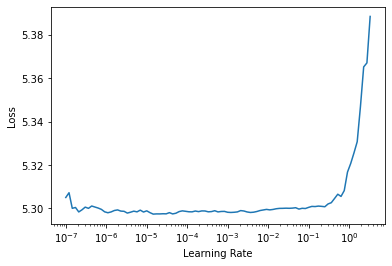

In [ ]:
learner1.lr_find()


# 2

In [ ]:
learner1.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.298550,5.299599,0.005178,00:16
1,5.299593,5.299598,0.005178,00:16
2,5.299170,5.299596,0.005178,00:16
3,5.299161,5.299594,0.005178,00:17
4,5.299603,5.299587,0.005178,00:16
5,5.300237,5.299579,0.005178,00:16
6,5.300165,5.299571,0.005178,00:16
7,5.300474,5.299559,0.005178,00:16
8,5.299117,5.299545,0.005178,00:16
9,5.299990,5.299525,0.005178,00:16


Adding more layers

In [ ]:
model2 = nn.Sequential(
    nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,32,kernel_size = 3,stride=1, padding=1),#1
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),#2
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,128,kernel_size = 3, stride = 1, padding = 1),#3
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model2)))

Parametros: 1945064


In [ ]:
learner2 = fv.Learner(data,model2, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=0.17378008365631104)

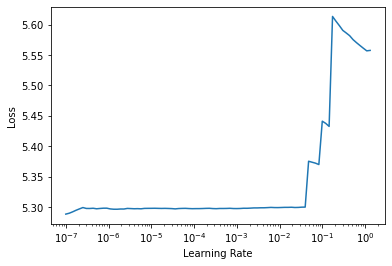

In [ ]:
learner2.lr_find()

In [ ]:
learner1.fit_one_cycle(5,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.299280,5.299205,0.005178,00:16
1,5.298839,5.299189,0.005178,00:16
2,5.300060,5.299181,0.005178,00:16
3,5.297622,5.299175,0.005178,00:16
4,5.299692,5.299175,0.005178,00:17


Change Relu to Tanh

In [ ]:
model3 = nn.Sequential(
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.Tanh(),
    nn.Linear(256,200)
)

In [ ]:
print("Parametros: " +str(num_params(model3)))

Parametros: 1751304


In [ ]:
learner3 = fv.Learner(data,model3, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=0.43651583790779114)

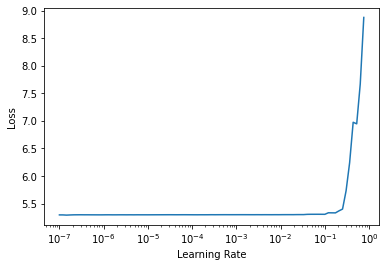

In [ ]:
learner3.lr_find()

In [ ]:
learner3.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.067808,5.096362,0.012254,00:16
1,5.062193,5.094976,0.012081,00:16
2,5.074617,5.093554,0.013290,00:16
3,5.081453,5.090192,0.013117,00:16
4,5.063766,5.086747,0.014153,00:16
5,5.066440,5.095558,0.010873,00:16
6,5.069346,5.073933,0.013117,00:16
7,5.062987,5.068306,0.012772,00:16
8,5.058167,5.061708,0.013462,00:16
9,5.040105,5.066309,0.012427,00:16


With no  padding and kernel_size = 2

In [ ]:
model4 = nn.Sequential(
    nn.Conv2d(3,32,kernel_size = 2, stride = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 2, stride = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 2, stride = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 2, stride = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 2, stride = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,200)
)

In [ ]:
print("Parametros: " +str(num_params(model4)))

Parametros: 880424


In [ ]:
learner4 = fv.Learner(data,model4, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=1.3182567358016968)

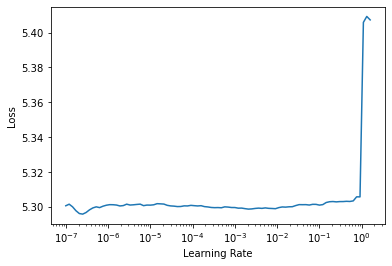

In [ ]:
learner4.lr_find()

In [ ]:
learner4.fit_one_cycle(50,lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,5.299733,5.298597,0.005178,00:27
1,5.233834,5.171199,0.009320,00:27
2,5.146238,5.109013,0.007939,00:27
3,5.110571,5.094105,0.012427,00:27
4,5.088990,5.050472,0.011391,00:27
5,5.055715,5.006883,0.013980,00:27
6,4.967424,4.968554,0.019848,00:27
7,4.908166,4.874866,0.021747,00:27
8,4.827702,4.877819,0.022264,00:27
9,4.689617,4.636830,0.039696,00:27


change ReLu to LeakyReLU

In [ ]:
model5 = nn.Sequential(
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 2, padding = 1),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 2, padding = 1),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 2, padding = 1),
    nn.LeakyReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 2, padding = 1),
    nn.LeakyReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.LeakyReLU(),
    nn.Linear(256,200)
)

In [ ]:
print("Parametros: " +str(num_params(model5)))

Parametros: 1751304


In [ ]:
learner5 = fv.Learner(data,model5, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=2.75422871709452e-06)

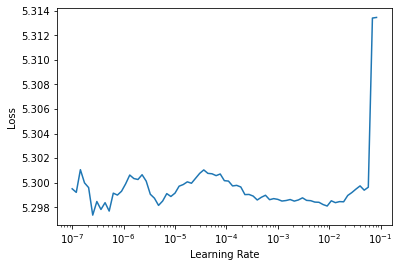

In [ ]:
learner5.lr_find()

In [ ]:
learner5.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.298705,5.298961,0.005178,00:16
1,5.300126,5.298956,0.005178,00:16
2,5.299327,5.298938,0.005178,00:16
3,5.298742,5.298916,0.005178,00:16
4,5.299001,5.298882,0.005178,00:16
5,5.300204,5.298826,0.005178,00:16
6,5.299670,5.298663,0.005178,00:16
7,5.298676,5.297862,0.005178,00:16
8,5.291161,5.280636,0.008630,00:16
9,5.216573,5.180527,0.009147,00:16


Adding more batchnorm layers

In [ ]:
model6 = nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(512),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,200)
)

In [ ]:
print("Parametros: " +str(num_params(model6)))

Parametros: 1753294


In [ ]:
learner6 = fv.Learner(data,model6, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=1.9054607152938843)

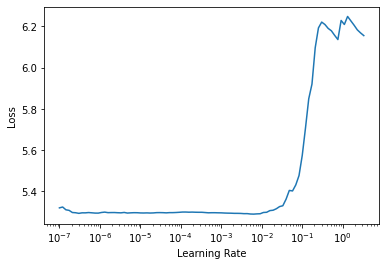

In [ ]:
learner6.lr_find()

In [ ]:
learner6.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.297749,5.297497,0.004660,00:18
1,5.286292,5.282755,0.008284,00:18
2,5.264320,5.257774,0.011736,00:18
3,5.229208,5.221406,0.017259,00:18
4,5.185054,5.172186,0.019330,00:18
5,5.127170,5.121115,0.019158,00:18
6,5.074756,5.054964,0.020538,00:18
7,5.006523,4.977326,0.025198,00:18
8,4.921087,4.906606,0.030204,00:18
9,4.840416,4.830551,0.035727,00:18


I got a nice accuracy adding batchnorm, all my models will have batchnorm

WIth no Maxpool2d 

In [ ]:
model7 = nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(512),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,200)
)

In [ ]:
print("Parametros: " +str(num_params(model7)))

Parametros: 1728108


In [ ]:
learner7 = fv.Learner(data,model7, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.001096478197723627, lr_steep=0.3630780577659607)

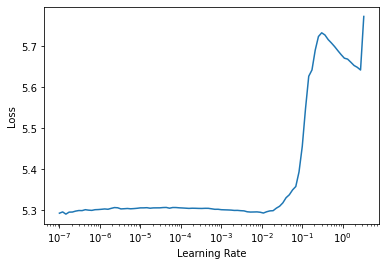

In [ ]:
learner7.lr_find()

In [ ]:
learner7.fit_one_cycle(5,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.338570,5.338064,0.005178,02:00
1,5.337275,5.337781,0.005178,02:01
2,5.330754,5.337568,0.005178,02:01
3,5.344420,5.337471,0.005178,02:01
4,5.336895,5.337454,0.005178,02:01


In [ ]:
model8 = nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2),
    nn.Conv2d(32,32,kernel_size = 3,stride=1, padding=1),#1
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(2),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),#2
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(2),
    nn.Conv2d(128,128,kernel_size = 3, stride = 1, padding = 1),#3
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.BatchNorm2d(512),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model8)))

Parametros: 1947502


In [ ]:
learner8 = fv.Learner(data,model8, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=2.7542287170945203e-07, lr_steep=1.3182567358016968)

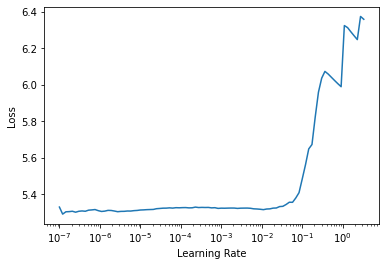

In [ ]:
learner8.lr_find()

In [ ]:
learner8.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.327461,5.330166,0.003279,00:28
1,5.329424,5.325500,0.002589,00:28
2,5.312357,5.313905,0.002244,00:28
3,5.299872,5.297470,0.004833,00:28
4,5.270911,5.268962,0.008630,00:29
5,5.231728,5.234465,0.012599,00:29
6,5.178087,5.180175,0.019848,00:29
7,5.119402,5.100682,0.027270,00:28
8,5.026813,4.990244,0.036244,00:29
9,4.898766,4.846795,0.038661,00:29


Adding Resblock

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, residual):
        super().__init__()
        self.residual = residual
    
    def forward(self, x):
        return x +self.residual(x)

In [ ]:
def crear_residual(filters):
    bottleneck = (filters+1)//2
    residual = nn.Sequential(
             nn.Conv2d(filters,bottleneck,kernel_size = 1),
             nn.ReLU(),
             nn.BatchNorm2d(bottleneck),
             nn.Conv2d(bottleneck,bottleneck,kernel_size = 3, padding = 1),
             nn.ReLU(),
             nn.BatchNorm2d(bottleneck),
             nn.Conv2d(bottleneck,filters,kernel_size = 1),
             nn.ReLU(),
             nn.BatchNorm2d(filters)
)
    nn.init.constant_(residual[-1].weight,0)# to ensure the weight are 0 we initialize it 
    return residual

In [ ]:
model_bn =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model_bn)))

Parametros: 1753742


In [ ]:
learnerbn = fv.Learner(data,model_bn, metrics = fv.accuracy,opt_func=fv.ranger)


In [ ]:
learnerbn.summary()

Sequential (Input shape: ['32 x 3 x 255 x 255'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm2d          32 x 3 x 255 x 255   6          True      
________________________________________________________________
Conv2d               32 x 32 x 128 x 128  896        True      
________________________________________________________________
ReLU                 32 x 32 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 64 x 64 x 64    18,496     True      
________________________________________________________________
BatchNorm2d          32 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 32 x 64 x 64 x 64    0          False     
_________________________________________________

SuggestedLRs(lr_min=0.002290867641568184, lr_steep=2.75422871709452e-06)

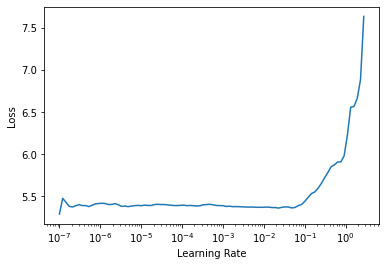

In [ ]:
learnerbn.lr_find()

In [ ]:
learnerbn.fit_one_cycle(50,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.303510,5.238150,0.012599,00:16
1,5.140627,5.115963,0.021747,00:15
2,5.023933,5.017373,0.027270,00:16
3,4.872434,4.949317,0.033138,00:16
4,4.711469,4.824841,0.043666,00:16
5,4.542203,4.534743,0.068347,00:16
6,4.343261,4.516556,0.067484,00:16
7,4.116421,4.160507,0.105281,00:16
8,3.882419,4.018868,0.103901,00:16
9,3.646872,3.892038,0.134795,00:15


In [ ]:
model_bn2 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model_bn2)))

Parametros: 1790798


In [ ]:
learnerbn2 = fv.Learner(data,model_bn2, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.002754228748381138, lr_steep=9.12010818865383e-07)

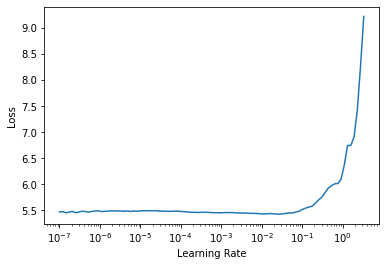

In [ ]:
learnerbn2.lr_find()

In [ ]:
learnerbn2.fit_one_cycle(50,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.331712,5.274113,0.014843,00:16
1,5.197798,5.148782,0.019330,00:16
2,5.037856,5.036800,0.023473,00:16
3,4.925797,4.953650,0.031067,00:17
4,4.742796,4.815027,0.040387,00:16
5,4.552405,4.571214,0.062996,00:17
6,4.329283,4.362913,0.077149,00:16
7,4.131481,4.121432,0.105799,00:17
8,3.845050,4.068084,0.118398,00:17
9,3.585387,3.875589,0.133414,00:17


More layers

In [ ]:
model_bn3 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model_bn3)))

Parametros: 1938638


In [ ]:
learnerbn3 = fv.Learner(data,model_bn3, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=1.4454397387453355e-05)

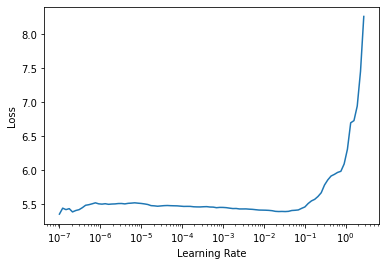

In [ ]:
learnerbn3.lr_find()

In [ ]:
learnerbn3.fit_one_cycle(50,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.314106,5.259505,0.013117,00:16
1,5.145639,5.123719,0.019330,00:17
2,5.010817,4.994308,0.029858,00:16
3,4.849319,4.818351,0.041595,00:17
4,4.632111,4.663865,0.052813,00:16
5,4.390660,4.276899,0.087677,00:16
6,4.147225,4.031103,0.110114,00:16
7,3.931190,4.035982,0.116500,00:16
8,3.638826,3.890006,0.128064,00:17
9,3.475982,3.886051,0.126510,00:16


I going to train model bn_2 with 100 epochs

In [ ]:
model_bn2 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model_bn2)))

Parametros: 1790798


In [ ]:
learnerbn2 = fv.Learner(data,model_bn2, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=6.309573450380412e-07)

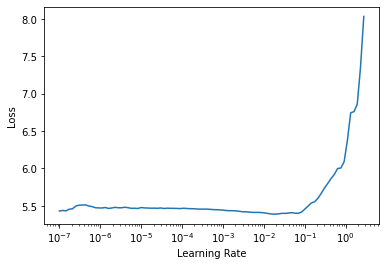

In [ ]:
learnerbn2.lr_find()

In [ ]:
learnerbn2.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.315240,5.268235,0.013462,00:17
1,5.159961,5.127422,0.021056,00:16
2,5.032308,5.038305,0.030031,00:16
3,4.937235,4.947299,0.038315,00:17
4,4.816785,4.875107,0.045910,00:16
5,4.729270,4.716043,0.056955,00:16
6,4.590121,4.656406,0.059890,00:16
7,4.436201,4.555713,0.071108,00:16
8,4.282480,4.394564,0.085261,00:16
9,4.100331,4.299438,0.098378,00:16


In [ ]:
model_bn =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model_bn)))

Parametros: 1753742


In [ ]:
learnerbn = fv.Learner(data,model_bn, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.002290867641568184, lr_steep=0.0020892962347716093)

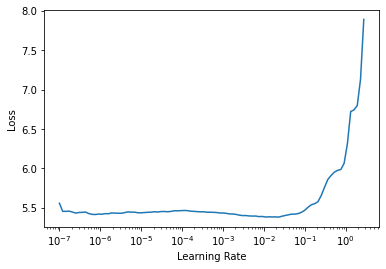

In [ ]:
learnerbn.lr_find()

In [ ]:
learnerbn.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.318316,5.263251,0.013290,00:16
1,5.175426,5.148595,0.021401,00:16
2,5.043251,5.056195,0.029858,00:16
3,4.946595,4.967208,0.035899,00:16
4,4.830145,4.899784,0.038661,00:16
5,4.710059,4.732710,0.054712,00:16
6,4.618161,4.607181,0.068519,00:16
7,4.478114,4.492604,0.076286,00:16
8,4.302356,4.405209,0.080255,00:16
9,4.134075,4.282304,0.094581,00:16


In [ ]:
model_bn2 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
print("Parametros: " +str(num_params(model_bn2)))

Parametros: 1790798


In [ ]:
learnerbn2 = fv.Learner(data,model_bn2, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=6.309573450380412e-07)

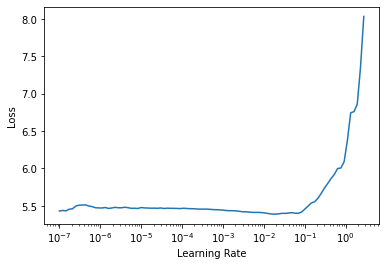

In [ ]:
learnerbn2.lr_find()

In [ ]:
learnerbn2.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.315240,5.268235,0.013462,00:17
1,5.159961,5.127422,0.021056,00:16
2,5.032308,5.038305,0.030031,00:16
3,4.937235,4.947299,0.038315,00:17
4,4.816785,4.875107,0.045910,00:16
5,4.729270,4.716043,0.056955,00:16
6,4.590121,4.656406,0.059890,00:16
7,4.436201,4.555713,0.071108,00:16
8,4.282480,4.394564,0.085261,00:16
9,4.100331,4.299438,0.098378,00:16


Add ResBlock layer

In [ ]:
model_bnr =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
num_params(model_bnr)

1804494

In [ ]:
learnerbnr = fv.Learner(data,model_bnr, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=2.75422871709452e-06)

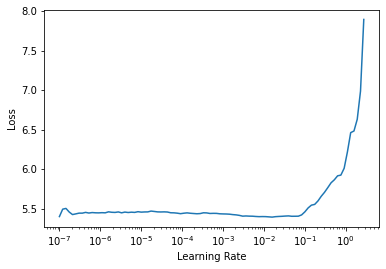

In [ ]:
learnerbnr.lr_find()

In [ ]:
learnerbnr.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.059440,3.291413,0.227994,00:17
1,3.018927,3.278597,0.230066,00:17
2,2.991163,3.264245,0.232482,00:16
3,2.979746,3.210850,0.241112,00:17
4,2.928176,3.195264,0.246117,00:16
5,2.910380,3.132487,0.261650,00:17
6,2.839203,3.088311,0.265965,00:16
7,2.774915,3.084957,0.273386,00:17
8,2.718726,3.008601,0.281326,00:17
9,2.630049,3.002767,0.287366,00:17


More Resblocks

In [ ]:
model_bnr2 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
num_params(model_bnr2)

1858510

In [ ]:
learnerbnr2 = fv.Learner(data,model_bnr2, metrics = fv.accuracy,opt_func=fv.ranger)


SuggestedLRs(lr_min=0.0007585775572806596, lr_steep=7.585775847473997e-07)

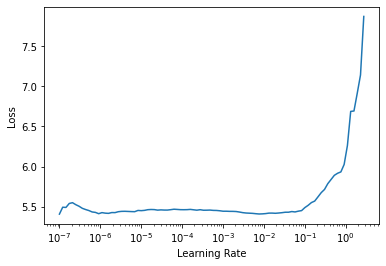

In [ ]:
learnerbnr2.lr_find()

In [ ]:
learnerbnr2.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.352845,5.312389,0.009838,00:20
1,5.195231,5.196229,0.014843,00:19
2,5.086152,5.119073,0.022610,00:19
3,4.996788,5.026299,0.029513,00:19
4,4.908936,4.929518,0.035381,00:20
5,4.763654,4.798583,0.052986,00:20
6,4.661878,4.682441,0.056093,00:19
7,4.504502,4.541917,0.068864,00:20
8,4.395426,4.451098,0.072316,00:19
9,4.242442,4.328724,0.084052,00:19


Resblock to each layer

In [ ]:
model_bnr3 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(256)),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
num_params(model_bnr3)

2073038

In [ ]:
model_bnr4 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(32)),                      
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,data.c)
)

In [ ]:
learnerbnr4 = fv.Learner(data,model_bnr4, metrics = fv.accuracy,opt_func=fv.ranger)


In [ ]:
num_params(model_bnr4)

1862030

SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.0012022644514217973)

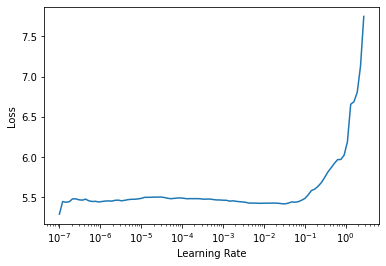

In [ ]:
learnerbnr4.lr_find()

In [ ]:
learnerbnr4.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.923263,4.168015,0.122368,00:20
1,3.880541,4.152321,0.130480,00:20
2,3.845298,4.110356,0.129789,00:20
3,3.814291,4.063176,0.131861,00:21
4,3.767980,4.068983,0.137901,00:21
5,3.739643,4.046714,0.132206,00:20
6,3.703084,3.934865,0.156196,00:20
7,3.636037,3.859330,0.149292,00:21
8,3.542357,3.816991,0.156886,00:20
9,3.435086,3.945796,0.139627,00:20


In [ ]:
learnerbnr4.validate()

(#2) [2.4054744243621826,0.5384880900382996]

In [ ]:
learnerbnr2.validate()

(#2) [2.432223320007324,0.5329651236534119]

# 3

The best model was earnerbnr4 

In [ ]:
files = zf.ZipFile("flowers.zip",'r')
files.extractall()
files.close()

In [ ]:
model_bnr4

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): ResBlock(
    (residual): Sequential(
      (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
      (7): ReLU()
      (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

Creating splitter

In [ ]:
def my_own_splitter(m):
    return [list(group.parameters()) for group in [m[0:5],m[5:13],m[13:18],m[18:25],m[25:]]]

Cargando el nuevo dataset para pre-entrenar


In [ ]:
def load_dataf(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.25,max_zoom=1.2,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
dataf = load_dataf("flowers/", img_size=224, batch_size=64)

In [ ]:
dataf.c

102

In [ ]:
model_bnr4 =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(32)),                      
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,dataf.c)
)

In [ ]:
learn = fv.Learner(dataf, model_bnr4, opt_func = fv.ranger, metrics = fv.accuracy, splitter = my_own_splitter)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0008317637839354575)

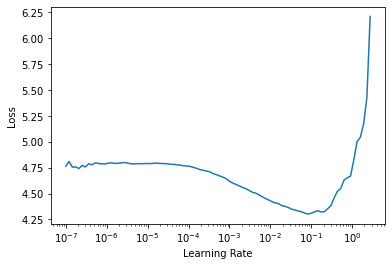

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.298481,4.058932,0.140316,00:15
1,3.819337,3.612166,0.203557,00:14
2,3.464616,3.286787,0.288538,00:14
3,3.191398,3.013947,0.339921,00:14
4,2.953480,2.822258,0.379447,00:14
5,2.723142,2.542872,0.424901,00:14
6,2.535682,2.398412,0.432806,00:14
7,2.332528,2.193438,0.480237,00:14
8,2.158591,2.103254,0.480237,00:14
9,1.988833,1.828307,0.553360,00:14


In [ ]:
learn.validate()

(#2) [0.2593871057033539,0.9308300614356995]

In [ ]:
learn.save('C9Net')


Path('models/C9Net.pth')

In [ ]:
learn.freeze_to()

In [ ]:
model_bnr4[-1]

Linear(in_features=256, out_features=102, bias=True)

In [ ]:
new_learn = fv.Learner(data, learn, opt_func = fv.ranger, metrics = fv.accuracy)

#learner101 = fv.cnn_learner(data, fv.resnet101, metrics=fv.accuracy, opt_func=fv.ranger)


In [ ]:
learn = fv.Learner(data, model_bnr4, opt_func = fv.ranger, metrics = fv.accuracy, splitter = my_own_splitter)

In [ ]:
Nlearner = learn.load('C9Net');

In [ ]:
Nlearner.summary()

Sequential (Input shape: ['32 x 3 x 255 x 255'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm2d          32 x 3 x 255 x 255   6          True      
________________________________________________________________
Conv2d               32 x 32 x 128 x 128  896        True      
________________________________________________________________
ReLU                 32 x 32 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 16 x 64 x 64    528        True      
________________________________________________________________
ReLU                 32 x 16 x 64 x 64    0          False     
________________________________________________________________
BatchNorm2d          32 x 16 x 64 x 64    32         True      
_________________________________________________

In [ ]:
Nlearner.model[-1]

Linear(in_features=256, out_features=102, bias=True)

In [ ]:
Nlearner.freeze_to(-1)

In [ ]:
Nlearner.summary()

Sequential (Input shape: ['32 x 3 x 255 x 255'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm2d          32 x 3 x 255 x 255   6          True      
________________________________________________________________
Conv2d               32 x 32 x 128 x 128  896        False     
________________________________________________________________
ReLU                 32 x 32 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 16 x 64 x 64    528        False     
________________________________________________________________
ReLU                 32 x 16 x 64 x 64    0          False     
________________________________________________________________
BatchNorm2d          32 x 16 x 64 x 64    32         True      
_________________________________________________

In [ ]:
Nlearner.model[-1] = nn.Linear(256,data.c)

In [ ]:
Nlearner.model[-1]

Linear(in_features=256, out_features=200, bias=True)

SuggestedLRs(lr_min=0.19054607152938843, lr_steep=0.25118863582611084)

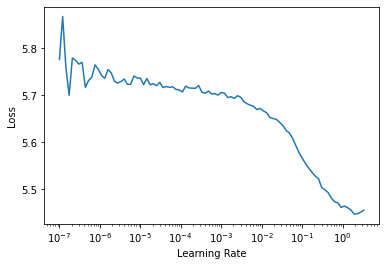

In [ ]:
Nlearner.lr_find()

# 4 

In [ ]:
Nlearner.fit_one_cycle(20,lr_max=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,5.007545,4.782323,0.059027,00:18
1,4.473303,4.590547,0.086469,00:18
2,4.210663,4.945946,0.078184,00:18
3,4.264199,7.913675,0.094753,00:18
4,4.035925,15.079213,0.096652,00:18
5,4.004217,11.831852,0.099758,00:18
6,3.703916,7.947007,0.136693,00:18
7,3.510615,5.471911,0.133241,00:18
8,3.376943,12.244423,0.124266,00:18
9,3.244490,4.560920,0.185882,00:18


In [ ]:
Nlearner.fit_one_cycle(80,lr_max=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.168458,6.155414,0.271660,00:18
1,2.160090,9.052862,0.267000,00:18
2,2.172026,6.434549,0.271660,00:18
3,2.228692,7.092610,0.268726,00:18
4,2.267985,7.249855,0.262340,00:18
5,2.309289,7.161027,0.255437,00:18
6,2.315642,6.701900,0.251812,00:18
7,2.412382,6.296546,0.227132,00:18
8,2.518897,7.365736,0.225060,00:18
9,2.601083,8.137918,0.231792,00:18


In [ ]:
Nlearner.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=4.786300905834651e-06)

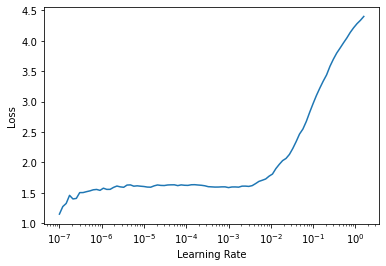

In [ ]:
Nlearner.lr_find()

In [ ]:
Nlearner.fit_one_cycle(10,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.618041,4.783176,0.289265,00:21
1,1.570947,5.663480,0.292889,00:20
2,1.603241,5.383519,0.294443,00:20
3,1.606388,4.486107,0.297377,00:20
4,1.510765,4.435196,0.297204,00:20
5,1.431007,4.292212,0.304280,00:20
6,1.438025,4.136541,0.302900,00:20
7,1.439652,4.530583,0.304453,00:20
8,1.400646,4.636424,0.305834,00:20
9,1.357935,4.574731,0.302727,00:20


In [ ]:
Nlearner.fit_one_cycle(90,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.352198,4.061615,0.309631,00:21
1,1.380709,4.592333,0.310148,00:20
2,1.369456,4.682805,0.307732,00:20
3,1.353780,4.946408,0.312392,00:20
4,1.413815,4.504651,0.312910,00:21
5,1.348241,3.638109,0.311529,00:20
6,1.369691,4.047832,0.311357,00:20
7,1.357694,4.276813,0.312047,00:20
8,1.366712,5.165871,0.306869,00:20
9,1.359649,4.578304,0.314463,00:20


In [ ]:
Nlearner.validate()

(#2) [3.524444341659546,0.3602001965045929]

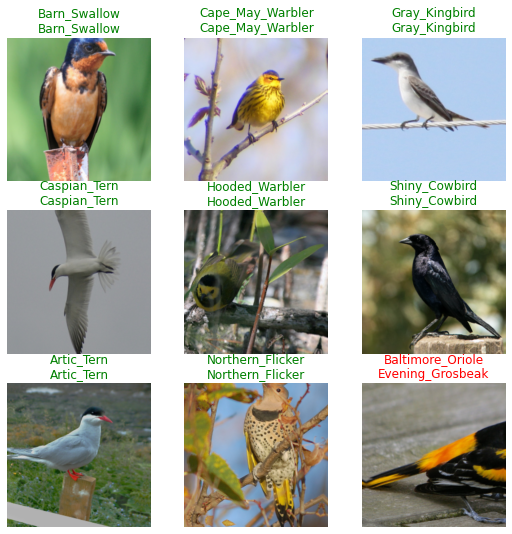

In [ ]:
Nlearner.show_results(ds_idx=3,dl=data.train,shuffle=True)


In [ ]:
interp = fv.ClassificationInterpretation.from_learner(Nlearner)


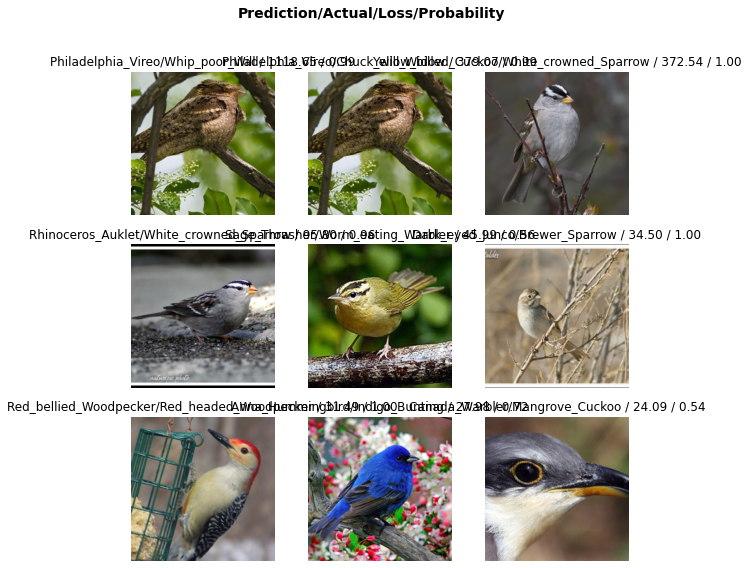

In [ ]:
interp.plot_top_losses(9)


In [ ]:
def load_dataf(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.25,max_zoom=1.2,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
dataf = load_dataf("flowers/", img_size=224, batch_size=64)

In [ ]:
dataf.c

102

In [ ]:
model_bnr4f =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(32)),                      
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,dataf.c)
)

In [ ]:
learnf = fv.Learner(dataf, model_bnr4f, opt_func = fv.ranger, metrics = fv.accuracy)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0020892962347716093)

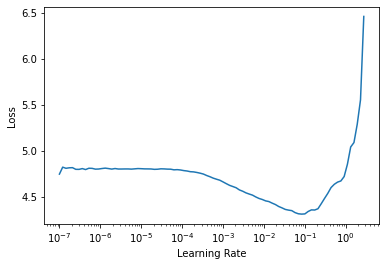

In [ ]:
learnf.lr_find()

In [ ]:
learnf.fit_one_cycle(100,lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.641310,3.274083,0.264822,00:15
1,3.018142,2.735953,0.371542,00:15
2,2.610993,2.378017,0.418972,00:14
3,2.275177,2.097330,0.456522,00:14
4,2.006579,1.877313,0.501976,00:14
5,1.817240,1.777308,0.539526,00:14
6,1.653308,1.450828,0.618577,00:14
7,1.531290,1.445017,0.618577,00:15
8,1.445754,1.438206,0.594862,00:15
9,1.335618,1.244584,0.667984,00:14


In [ ]:
def load_datap(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_datap("prueba2/", img_size=255, batch_size=32)

In [ ]:
data.c

200

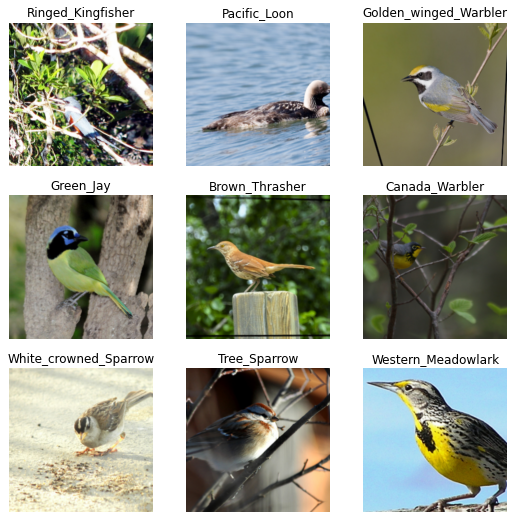

In [ ]:
data.show_batch()

In [ ]:
model_bnr4f[-1] = nn.Linear(256,data.c)

In [ ]:
def my_own_splitter2(m):
    return [list(group.parameters()) for group in [m[0:5],m[5:13],m[13:18],m[18:25],m[25:-1],m[-1]]]

In [ ]:
learnerpajaros = fv.Learner(data, model_bnr4f, opt_func = fv.ranger, metrics = fv.accuracy,splitter = my_own_splitter2)

In [ ]:
learnerpajaros.freeze_to(-1)

In [ ]:
learnerpajaros.summary()

Sequential (Input shape: ['32 x 3 x 255 x 255'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm2d          32 x 3 x 255 x 255   6          True      
________________________________________________________________
Conv2d               32 x 32 x 128 x 128  896        False     
________________________________________________________________
ReLU                 32 x 32 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 16 x 64 x 64    528        False     
________________________________________________________________
ReLU                 32 x 16 x 64 x 64    0          False     
________________________________________________________________
BatchNorm2d          32 x 16 x 64 x 64    32         True      
_________________________________________________

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=6.309573450380412e-07)

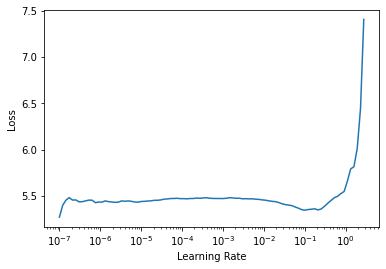

In [ ]:
learnerpajaros.lr_find()

In [ ]:
learnerpajaros.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.450755,5.452876,0.004142,00:19
1,5.410799,5.420407,0.005523,00:19
2,5.354794,5.361513,0.007421,00:19
3,5.270907,5.295778,0.009320,00:20
4,5.177268,5.211689,0.015188,00:19
5,5.061367,5.106865,0.021574,00:19
6,4.932102,4.991446,0.032620,00:20
7,4.790027,4.864409,0.044356,00:19
8,4.620193,4.735711,0.058164,00:19
9,4.469395,4.611195,0.068519,00:19


i have overfitting so i need to train again

In [ ]:
def load_dataf(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=True, max_rotate=360, max_lighting=0.25,max_zoom=1.2,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
dataf = load_dataf("flowers/", img_size=224, batch_size=64)

In [ ]:
dataf.c

102

In [ ]:
model_bnr4f =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(32)),                      
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,dataf.c)
)

In [ ]:
learnf = fv.Learner(dataf, model_bnr4f, opt_func = fv.ranger, metrics = fv.accuracy)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.00363078061491251)

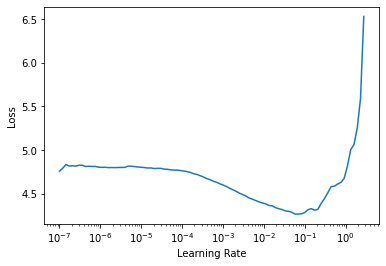

In [ ]:
learnf.lr_find()

In [ ]:
learnf.fit_one_cycle(100,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.220079,3.925605,0.189723,00:14
1,3.733478,3.508747,0.243083,00:15
2,3.402651,3.193582,0.298419,00:14
3,3.136771,2.897231,0.349802,00:14
4,2.902339,2.700164,0.418972,00:15
5,2.673044,2.501682,0.424901,00:14
6,2.493293,2.323295,0.446640,00:14
7,2.304513,2.186954,0.458498,00:14
8,2.155495,2.035904,0.515810,00:14
9,1.995152,1.829900,0.575099,00:14


In [ ]:
def load_datap(folder, img_size, batch_size):
    
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.25,max_zoom=1.0,max_warp=0.2)
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
data = load_datap("prueba2/", img_size=255, batch_size=32)

In [ ]:
data.c

200

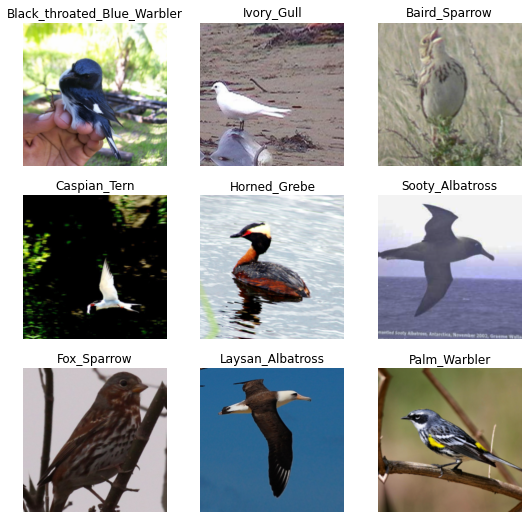

In [ ]:
data.show_batch()

In [ ]:
model_bnr4f[-1] = nn.Linear(256,data.c)

In [ ]:
def my_own_splitter2(m):
    return [list(group.parameters()) for group in [m[0:5],m[5:13],m[13:18],m[18:25],m[25:-1],m[-1]]]

In [ ]:
learnerpajaros = fv.Learner(data, model_bnr4f, opt_func = fv.ranger, metrics = fv.accuracy,splitter = my_own_splitter2)

In [ ]:
learnerpajaros.freeze_to(-1)

In [ ]:
learnerpajaros.summary()

Sequential (Input shape: ['32 x 3 x 255 x 255'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm2d          32 x 3 x 255 x 255   6          True      
________________________________________________________________
Conv2d               32 x 32 x 128 x 128  896        False     
________________________________________________________________
ReLU                 32 x 32 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 32 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 16 x 64 x 64    528        False     
________________________________________________________________
ReLU                 32 x 16 x 64 x 64    0          False     
________________________________________________________________
BatchNorm2d          32 x 16 x 64 x 64    32         True      
_________________________________________________

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=3.981071586167673e-06)

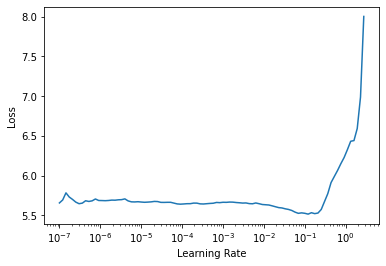

In [ ]:
learnerpajaros.lr_find()

In [ ]:
learnerpajaros.fit_one_cycle(40,lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,5.664957,5.663358,0.005523,00:19
1,5.569379,5.555491,0.007421,00:19
2,5.389862,5.351662,0.011909,00:19
3,5.088313,5.096227,0.023818,00:19
4,4.755315,4.794661,0.049707,00:19
5,4.433548,4.552292,0.074732,00:19
6,4.173540,4.339806,0.095789,00:19
7,3.928947,4.198051,0.113048,00:19
8,3.799421,4.095648,0.128754,00:19
9,3.587106,4.004703,0.142216,00:19


In [ ]:
learnerpajaros.unfreeze()

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=0.0003311311302240938)

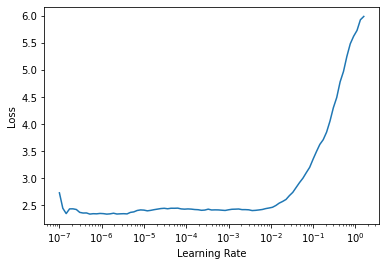

In [ ]:
learnerpajaros.lr_find()

In [ ]:
learnerpajaros.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.395215,3.655680,0.205557,00:20
1,2.369199,3.655407,0.205040,00:20
2,2.374751,3.654781,0.203659,00:20
3,2.353759,3.631771,0.211598,00:21
4,2.317814,3.569184,0.217639,00:20
5,2.296866,3.539866,0.217984,00:20
6,2.214746,3.515018,0.224197,00:20
7,2.226822,3.458541,0.231446,00:21
8,2.160287,3.432006,0.235589,00:20
9,2.129155,3.427529,0.235589,00:21


In [ ]:
learnerpajaros.fit_one_cycle(50,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.174954,2.949968,0.322402,00:21
1,1.166574,2.967923,0.318088,00:20
2,1.190507,2.962070,0.319641,00:21
3,1.183571,2.950376,0.319986,00:21
4,1.199592,2.938867,0.321885,00:21
5,1.212140,2.930793,0.326027,00:20
6,1.229173,2.916427,0.323783,00:21
7,1.180099,2.946084,0.325337,00:22
8,1.169674,2.954056,0.321367,00:22
9,1.126772,2.914272,0.328616,00:20


# 5

Adding one image in black and white

In [ ]:
def load_datanegro(folder, img_size, batch_size):
    tfms = fv.aug_transforms(flip_vert=False, max_rotate=10, max_lighting=0.2,max_zoom=1.0,max_warp=0.2,
                             xtra_tfms = fv.Saturation(p=0.1, draw = 0.))
    
    
    data = fv.DataBlock(
                        blocks    = (fv.ImageBlock, fv.CategoryBlock),
                        get_items = fv.get_image_files,
                        get_y     = lambda x: x.parent.name,
                        splitter  = fv.GrandparentSplitter(),
                        item_tfms = fv.Resize(img_size),
                        batch_tfms= tfms,
                     )
    return data.dataloaders(folder,bs=batch_size)

In [ ]:
datanegro = load_datanegro("prueba2/", img_size=255, batch_size=32)

In [ ]:
datanegro.c

200

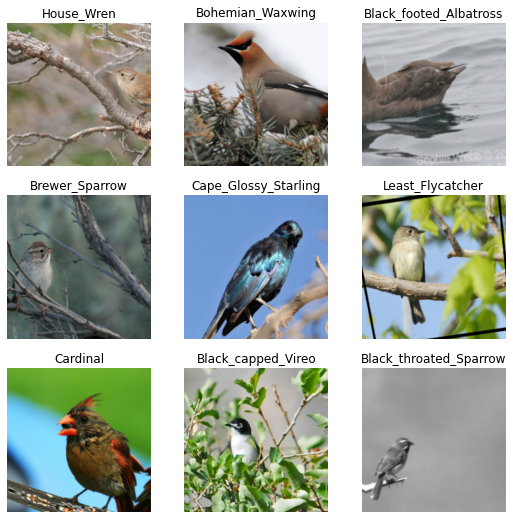

In [ ]:
datanegro.show_batch()

In [ ]:
model_blanco =  nn.Sequential(nn.BatchNorm2d(3),
    nn.Conv2d(3,32,kernel_size = 3, stride = 2, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(32)),                      
    nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64,64,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(64)),               
    nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),
    ResBlock(crear_residual(128)), 
    nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(256,512,kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.BatchNorm1d(512),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256,datanegro.c)
)

In [ ]:
learnerblanco = fv.Learner(datanegro,model_blanco, metrics = fv.accuracy,opt_func=fv.ranger)


In [ ]:
num_params(model_blanco)

1862030

SuggestedLRs(lr_min=0.002290867641568184, lr_steep=1.3182567499825382e-06)

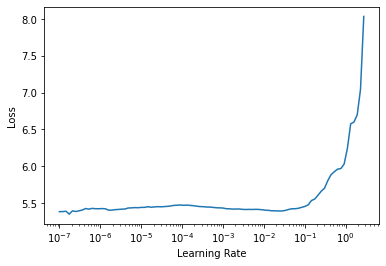

In [ ]:
learnerblanco.lr_find()

In [ ]:
learnerblanco.fit_one_cycle(100,lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,5.438652,5.429452,0.005696,00:21
1,5.388273,5.362000,0.010183,00:21
2,5.288392,5.289698,0.012427,00:21
3,5.218544,5.235119,0.015706,00:21
4,5.186603,5.174850,0.019848,00:21
5,5.126659,5.124053,0.023818,00:21
6,5.051246,5.078591,0.030549,00:21
7,5.004832,5.027567,0.031067,00:21
8,4.968544,4.987179,0.035727,00:21
9,4.911848,4.941526,0.038315,00:21


In [ ]:
learnerblanco.validate()

(#2) [2.676957845687866,0.3641698360443115]